# **df1-3rd-model-training**

# **Insurance Risk & Claims Dataset**


# **Fraud Detection**

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/df1_scaled.csv')

In [ ]:
df1.head()

Unnamed: 0                             Policy_ID  Customer_Age  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58   
1           1  23b8c1e9-3924-46de-beb1-3b9046685257            65   
2           2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56   
3           3  972a8469-1641-4f82-8b9d-2434e465e150            35   
4           4  17fc695a-07a0-4a6e-8822-e8f36c031199            39   

   Annual_Income  Vehicle_Age_Property_Age  Claim_History  Premium_Amount  \
0       0.741442                         7              1        0.139545   
1       0.590267                         1              0        0.093670   
2       0.715891                        22              4        0.419729   
3       0.697997                        10              2        0.155499   
4       0.379538                        11              2        0.604068   

   Claim_Amount  Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  \
0      0.102080                 0                   0                 0   
1      0.232579                 0                   0                 0   
2      0.449681                 0                   1                 1   
3      0.958985                 1                   1                 1   
4      0.808517                 1                   2                 0   

   Policy_Type_Health  Policy_Type_Life  Policy_Type_Property  Gender_Female  \
0                   1                 0                     0              0   
1                   1                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 0                     0              0   

   Gender_Male  Gender_Other  
0            1             0  
1            0             1  
2            1             0  
3            1             0  
4            1             0

In [ ]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df1.head(1)

Policy_ID  Customer_Age  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58       0.741442   

   Vehicle_Age_Property_Age  Claim_History  Premium_Amount  Claim_Amount  \
0                         7              1        0.139545       0.10208   

   Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  Policy_Type_Health  \
0                 0                   0                 0                   1   

   Policy_Type_Life  Policy_Type_Property  Gender_Female  Gender_Male  \
0                 0                     0              0            1   

   Gender_Other  
0             0

In [ ]:
feature = df1.copy()

feature = feature.drop(columns=['Policy_ID','Fraudulent_Claim'])

In [ ]:
target = df1['Fraudulent_Claim']

In [ ]:
feature.head()

Customer_Age  Annual_Income  Vehicle_Age_Property_Age  Claim_History  \
0            58       0.741442                         7              1   
1            65       0.590267                         1              0   
2            56       0.715891                        22              4   
3            35       0.697997                        10              2   
4            39       0.379538                        11              2   

   Premium_Amount  Claim_Amount  Risk_Score_Encoded  Policy_Type_Auto  \
0        0.139545      0.102080                   0                 0   
1        0.093670      0.232579                   0                 0   
2        0.419729      0.449681                   1                 1   
3        0.155499      0.958985                   1                 1   
4        0.604068      0.808517                   2                 0   

   Policy_Type_Health  Policy_Type_Life  Policy_Type_Property  Gender_Female  \
0                   1                 0                     0              0   
1                   1                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 0                     0              0   

   Gender_Male  Gender_Other  
0            1             0  
1            0             1  
2            1             0  
3            1             0  
4            1             0

In [ ]:
target.head()

0    0
1    0
2    0
3    1
4    1
Name: Fraudulent_Claim, dtype: int64

# **Select Feature Using Filter Method**

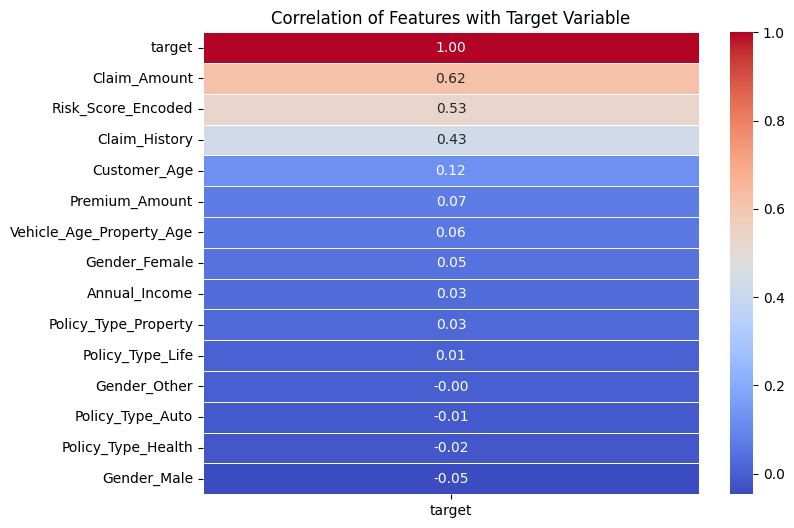

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one DataFrame
df = feature.copy()
df['target'] = target  # Add target column to the DataFrame

# Calculate correlation matrix
correlation_matrix = df.corr()

# Isolate target correlations
target_corr = correlation_matrix[['target']].sort_values(by='target', ascending=False)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show
plt.title('Correlation of Features with Target Variable')
plt.show()


In [ ]:
############################################################################

# **Select Highly Contributed Columns for feature using RFE -Recursive Feature Elimination (RFE) (Wrapper Method)**

# **can apply RFE with Random Forest Regressor:**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('/content/df1_scaled.csv')

# Separate features and target
X = df.drop(columns=['Unnamed: 0','Policy_ID','Fraudulent_Claim'])  # Replace with your actual target column name
y = df['Fraudulent_Claim']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE
rfe = RFE(estimator=rf, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Optional: Check feature ranking
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_})
print(feature_ranking.sort_values(by='Ranking'))


Selected Features: Index(['Customer_Age', 'Annual_Income', 'Vehicle_Age_Property_Age',
       'Claim_History', 'Premium_Amount', 'Claim_Amount', 'Risk_Score_Encoded',
       'Gender_Female', 'Gender_Male', 'Gender_Other'],
      dtype='object')
                     Feature  Ranking
0               Customer_Age        1
1              Annual_Income        1
2   Vehicle_Age_Property_Age        1
3              Claim_History        1
4             Premium_Amount        1
5               Claim_Amount        1
6         Risk_Score_Encoded        1
11             Gender_Female        1
12               Gender_Male        1
13              Gender_Other        1
8         Policy_Type_Health        2
9           Policy_Type_Life        3
10      Policy_Type_Property        4
7           Policy_Type_Auto        5


took Features for Model Training

**Vehicle_Age_Property_Age, Premium_Amount, Claim_Amount**

In [ ]:
feature = df1[['Vehicle_Age_Property_Age','Premium_Amount','Claim_Amount','Claim_History']]

In [ ]:
target = df1['Fraudulent_Claim']

# **1) Model Training**

In [ ]:
x = feature
y = target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
target.value_counts()

Fraudulent_Claim
0    700
1    300
Name: count, dtype: int64

# **Target is Binary Classification Type**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logi_model = LogisticRegression()

In [ ]:
logi_model.fit(x_train,y_train)

LogisticRegression()

# **For Test prediction**

In [ ]:
y_pred_test = logi_model.predict(x_test)

# **Test Data**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")


Accuracy: 0.94
Precision: 0.9259259259259259
Recall: 0.8620689655172413
F1 Score: 0.8928571428571429
Confusion Matrix:
[[138   4]
 [  8  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       142
           1       0.93      0.86      0.89        58

    accuracy                           0.94       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.94      0.94      0.94       200



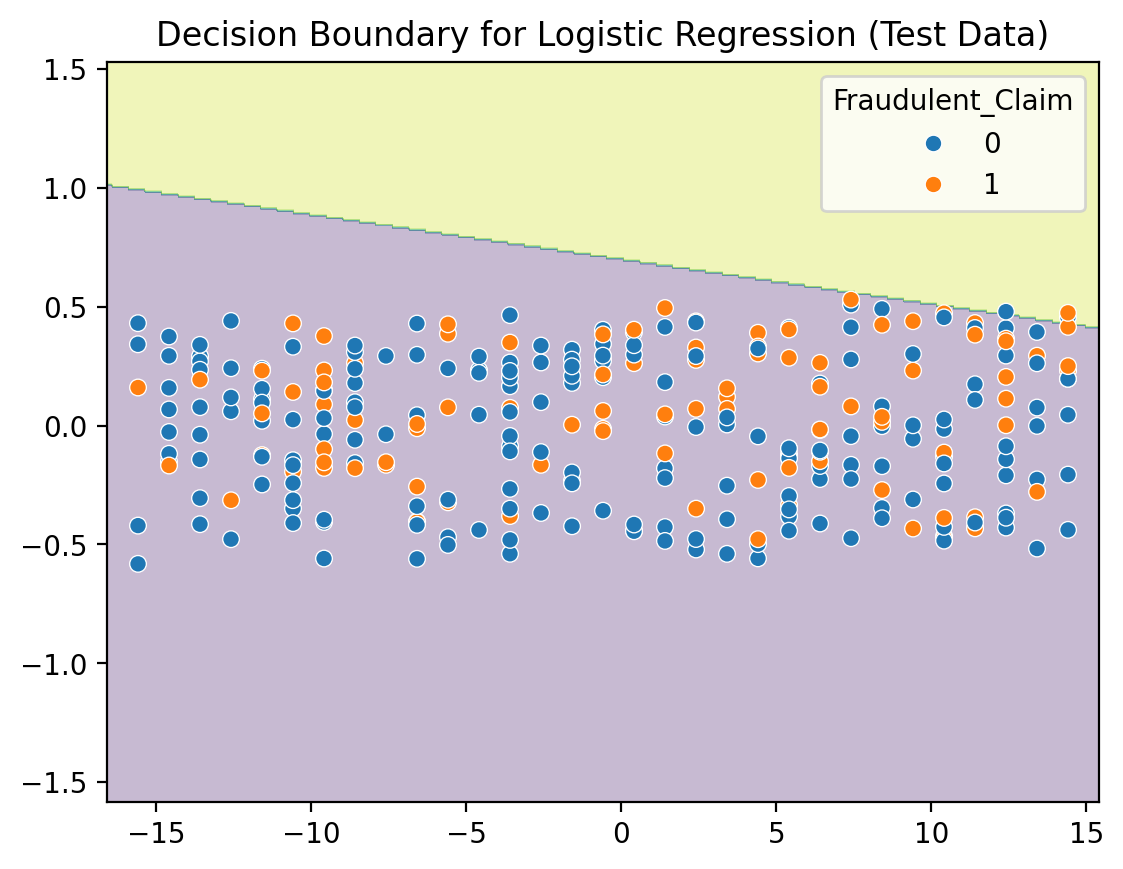

In [ ]:
#######################################################################################################

# **Train and Test Result Compare to Overfit or Underfit**

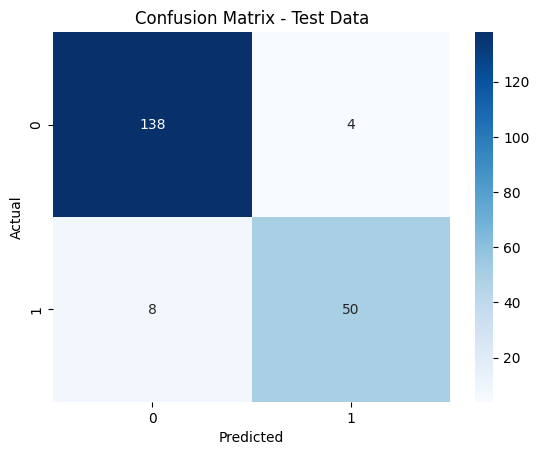

Test Data Results:
Accuracy: 0.94
Precision: 0.9259259259259259
Recall: 0.8620689655172413
F1 Score: 0.8928571428571429
True Positives (TP): 50
True Negatives (TN): 138
False Positives (FP): 4
False Negatives (FN): 8

Interpretation:
- True Positives: 50 cases where the model correctly predicted fraud.
- True Negatives: 138 cases where the model correctly predicted no fraud.
- False Positives: 4 cases where the model wrongly predicted fraud when there was none.
- False Negatives: 8 cases where the model missed actual fraud.

Train Data Results:
Accuracy: 0.93625
Precision: 0.920704845814978
Recall: 0.8636363636363636
F1 Score: 0.8912579957356077

Model seems well-balanced between train and test data.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test data
y_pred_test = logi_model.predict(x_test)

# Predictions for train data
y_pred_train = logi_model.predict(x_train)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate metrics for train data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Print test data metrics
print("Test Data Results:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print interpretation of results
print("\nInterpretation:")
print(f"- True Positives: {TP} cases where the model correctly predicted fraud.")
print(f"- True Negatives: {TN} cases where the model correctly predicted no fraud.")
print(f"- False Positives: {FP} cases where the model wrongly predicted fraud when there was none.")
print(f"- False Negatives: {FN} cases where the model missed actual fraud.")

# Print train data metrics
print("\nTrain Data Results:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

# Check for overfitting or underfitting
if abs(accuracy_train - accuracy_test) > 0.05:
    if accuracy_train > accuracy_test:
        print("\nPossible Overfitting: Model performs much better on training data than test data.")
    else:
        print("\nPossible Underfitting: Model performs better on test data than training data.")
else:
    print("\nModel seems well-balanced between train and test data.")


True Positives (TP): 50,

True Negatives (TN): 138,

False Positives (FP): 4,

False Negatives (FN): 8

# **Interpretation:**

- True Positives: 50 cases where the model correctly predicted fraud.

- True Negatives: 138 cases where the model correctly predicted no fraud.

- False Positives: 4 cases where the model wrongly predicted fraud when there was none.

- False Negatives: 8 cases where the model missed actual fraud.

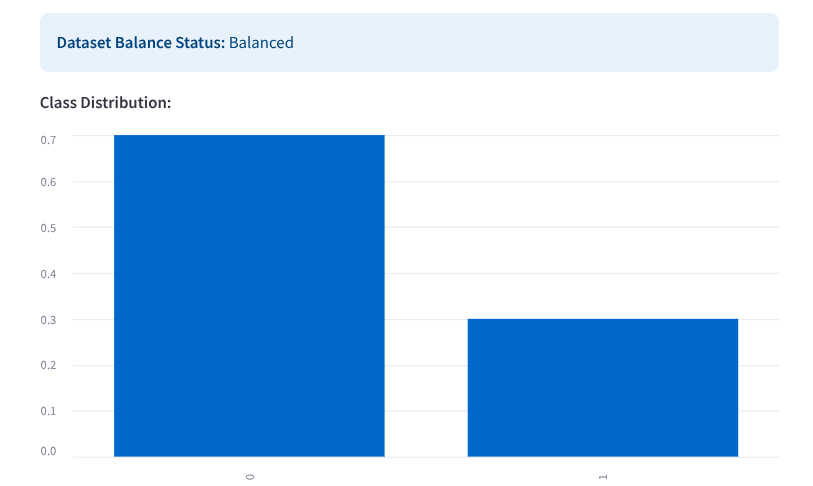

# **My Dataset is Balanced**

**70:30**

# **ROC and AUC Curve**

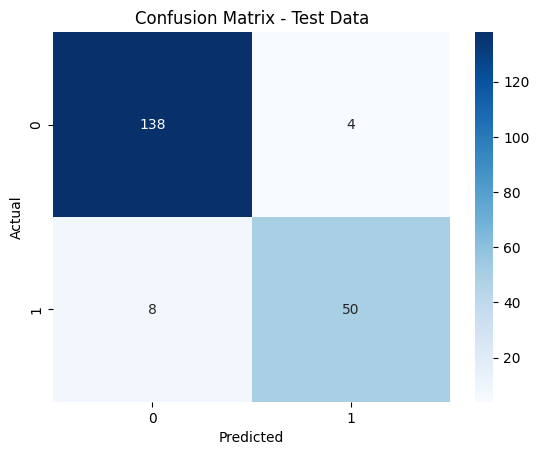

Test Data Results:
Accuracy: 0.94
Precision: 0.9259259259259259
Recall: 0.8620689655172413
F1 Score: 0.8928571428571429
True Positives (TP): 50
True Negatives (TN): 138
False Positives (FP): 4
False Negatives (FN): 8

Interpretation:
- True Positives: 50 cases where the model correctly predicted fraud.
- True Negatives: 138 cases where the model correctly predicted no fraud.
- False Positives: 4 cases where the model wrongly predicted fraud when there was none.
- False Negatives: 8 cases where the model missed actual fraud.


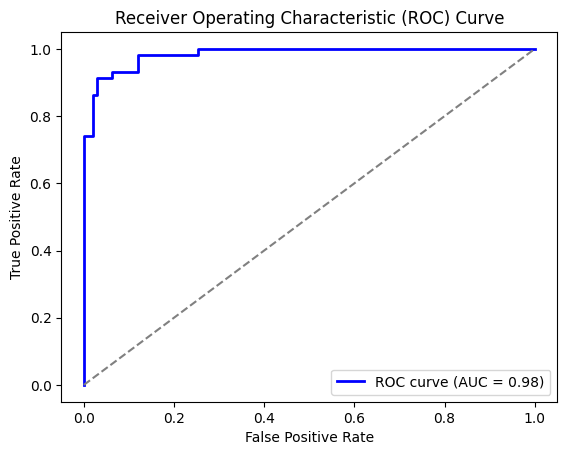


AUC (Area Under the Curve): 0.9843370568237009

Why ROC and AUC are important:
- The ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (1 - False Positive Rate).
- AUC represents the probability that the model ranks a random positive example more highly than a random negative example.
- AUC closer to 1 means a better-performing model, while 0.5 suggests no discrimination between classes.

Suggested optimal threshold: 0.49
- This threshold balances sensitivity and specificity to achieve the best classification performance.

Train Data Results:
Accuracy: 0.93625
Precision: 0.920704845814978
Recall: 0.8636363636363636
F1 Score: 0.8912579957356077

Model seems well-balanced between train and test data.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test data
y_pred_test = logi_model.predict(x_test)

# Predictions for train data
y_pred_train = logi_model.predict(x_train)

# Predicted probabilities for ROC curve
y_probs_test = logi_model.predict_proba(x_test)[:, 1]

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate metrics for train data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Print test data metrics
print("Test Data Results:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print interpretation of results
print("\nInterpretation:")
print(f"- True Positives: {TP} cases where the model correctly predicted fraud.")
print(f"- True Negatives: {TN} cases where the model correctly predicted no fraud.")
print(f"- False Positives: {FP} cases where the model wrongly predicted fraud when there was none.")
print(f"- False Negatives: {FN} cases where the model missed actual fraud.")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"\nAUC (Area Under the Curve): {roc_auc}")

# Interpretation of ROC and AUC
print("\nWhy ROC and AUC are important:")
print("- The ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (1 - False Positive Rate).")
print("- AUC represents the probability that the model ranks a random positive example more highly than a random negative example.")
print("- AUC closer to 1 means a better-performing model, while 0.5 suggests no discrimination between classes.")

# Choosing an appropriate threshold
best_threshold_index = (tpr - fpr).argmax()
best_threshold = thresholds[best_threshold_index]
print(f"\nSuggested optimal threshold: {best_threshold:.2f}")
print("- This threshold balances sensitivity and specificity to achieve the best classification performance.")

# Print train data metrics
print("\nTrain Data Results:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

# Check for overfitting or underfitting
if abs(accuracy_train - accuracy_test) > 0.05:
    if accuracy_train > accuracy_test:
        print("\nPossible Overfitting: Model performs much better on training data than test data.")
    else:
        print("\nPossible Underfitting: Model performs better on test data than training data.")
else:
    print("\nModel seems well-balanced between train and test data.")


# **Differnce of True Posative Rate (TPR) and False Posative Rate (FPR) : TPR-FPR to find Best Optimal Threshold for this model**

**AUC (Area Under the Curve): 0.9843370568237009 is Almost near to 1: so its very Good**



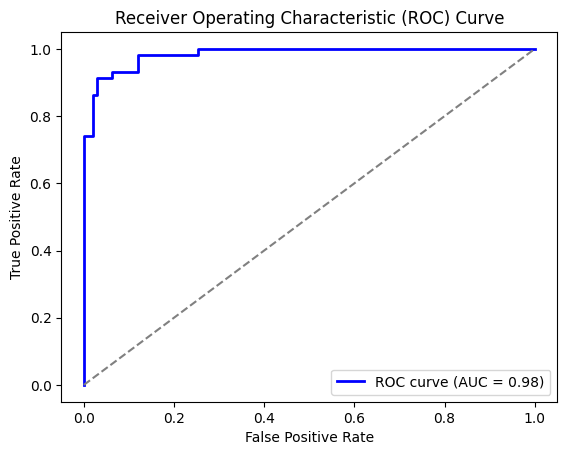

AUC (Area Under the Curve): 0.9843370568237009

Recommendation: Excellent model performance. Consider tuning threshold for slight improvements.


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for ROC curve
y_probs_test = logi_model.predict_proba(x_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC (Area Under the Curve): {roc_auc}")

# Option to change threshold
def evaluate_threshold(threshold):
    y_pred_custom = (y_probs_test >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred_custom)
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"\nThreshold: {threshold}")
    print(f"True Positives: {TP}")
    print(f"True Negatives: {TN}")
    print(f"False Positives: {FP}")
    print(f"False Negatives: {FN}")

# Recommendation based on AUC
if roc_auc >= 0.9:
    print("\nRecommendation: Excellent model performance. Consider tuning threshold for slight improvements.")
elif 0.8 <= roc_auc < 0.9:
    print("\nRecommendation: Good model performance. Fine-tune the threshold to balance sensitivity and specificity.")
elif 0.7 <= roc_auc < 0.8:
    print("\nRecommendation: Acceptable performance. Consider further feature engineering and threshold adjustment.")
else:
    print("\nRecommendation: Poor model performance. Revisit data preprocessing, feature selection, or model choice.")


**AUC stands for Area Under the Curve and ROC stands for Receiver Operating Characteristic.**

ROC Curve: It’s a graph showing the performance of a classification model at all possible classification thresholds. **It plots the True Positive Rate (Sensitivity) against the False Positive Rate** (1 - Specificity).

AUC: This measures the area under the ROC curve — a single value that summarizes the model’s ability to distinguish between classes. **AUC closer to 1 indicates a better-performing model, while 0.5 suggests no better performance than random guessing.**


# **Statement: My Point of View**

# is AUC and ROC Curve focus maximum increasing a true posative value from false posative

# eg: to get avoid little bit fraud person to get more customer bank.

**The goal is usually to avoid too many false positives while still catching enough fraud — like you said, so the bank avoids falsely rejecting too many good customers while still identifying fraud**

# **Save this Model:**

In [ ]:
import joblib

# Save the model to a file
joblib.dump(logi_model, 'logi_model.pkl')

print("Model saved successfully!")


Model saved successfully!
